<a href="https://colab.research.google.com/github/amritavarshini04/Finlatics_ml_projects/blob/main/Case_project_facebook_marketplace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler

load the data

In [6]:
df = pd.read_csv("Facebook_Marketplace_data.csv")

Drop completely empty columns

In [7]:
df.drop(columns=["Column1", "Column2", "Column3", "Column4"])

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,7046,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0
7046,7047,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0
7047,7048,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0
7048,7049,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0


Convert 'status_published' to datetime

In [8]:
df['status_published'] = pd.to_datetime(df['status_published'], errors='coerce')


Drop rows with invalid or missing datetime (optional)


In [9]:
df.dropna(subset=['status_published'])

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,7046,photo,2016-09-24 02:58:00,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,7047,photo,2016-09-23 11:19:00,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,7048,photo,2016-09-21 23:03:00,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,7049,photo,2016-09-20 00:43:00,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


Optionally extract features from the date

In [10]:
df['published_hour'] = df['status_published'].dt.hour
df['published_day'] = df['status_published'].dt.day
df['published_weekday'] = df['status_published'].dt.weekday
df['published_month'] = df['status_published'].dt.month

Drop the original datetime column if not needed

In [11]:
df.drop(columns=['status_published'])

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4,published_hour,published_day,published_weekday,published_month
0,1,video,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN,6,22,6,4
1,2,photo,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN,22,21,5,4
2,3,video,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN,6,21,5,4
3,4,photo,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN,2,21,5,4
4,5,photo,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN,3,18,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,7046,photo,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN,2,24,5,9
7046,7047,photo,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN,11,23,4,9
7047,7048,photo,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN,23,21,2,9
7048,7049,photo,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN,0,20,1,9


Normalize numeric features (excluding ID column)

In [12]:
from sklearn.preprocessing import StandardScaler

Only scale numeric columns (exclude 'status_id' and datetime columns)

In [13]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.difference(['status_id'])


Initialize the scaler

In [14]:
scaler = StandardScaler()

Apply scaling

In [15]:
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [16]:
print(df.head())

   status_id status_type    status_published  num_reactions  num_comments  \
0          1       video 2018-04-22 06:00:00       0.646104      0.323350   
1          2       photo 2018-04-21 22:45:00      -0.173192     -0.252206   
2          3       video 2018-04-21 06:17:00      -0.006738      0.013089   
3          4       photo 2018-04-21 02:29:00      -0.257499     -0.252206   
4          5       photo 2018-04-18 03:22:00      -0.037003     -0.252206   

   num_shares  num_likes  num_loves  num_wows  num_hahas  num_sads  \
0    1.686879   0.482727   1.983266  0.196196   0.076713  0.473570   
1   -0.304144  -0.144720  -0.318454 -0.147879  -0.176010 -0.152587   
2    0.129017  -0.024571   0.206938 -0.033187   0.076713 -0.152587   
3   -0.304144  -0.231495  -0.318454 -0.147879  -0.176010 -0.152587   
4   -0.304144  -0.024571  -0.093286 -0.147879  -0.176010 -0.152587   

   num_angrys  Column1  Column2  Column3  Column4  published_hour  \
0   -0.155748      NaN      NaN      NaN      N

How does the time of upload (`status_published`)  affects the `num_reaction`?

In [17]:
df['status_published'] = pd.to_datetime(df['status_published'], errors='coerce')
df['publish_hour'] = df['status_published'].dt.hour
hourly_reactions = df.groupby('publish_hour')['num_reactions'].mean()

plotting the same

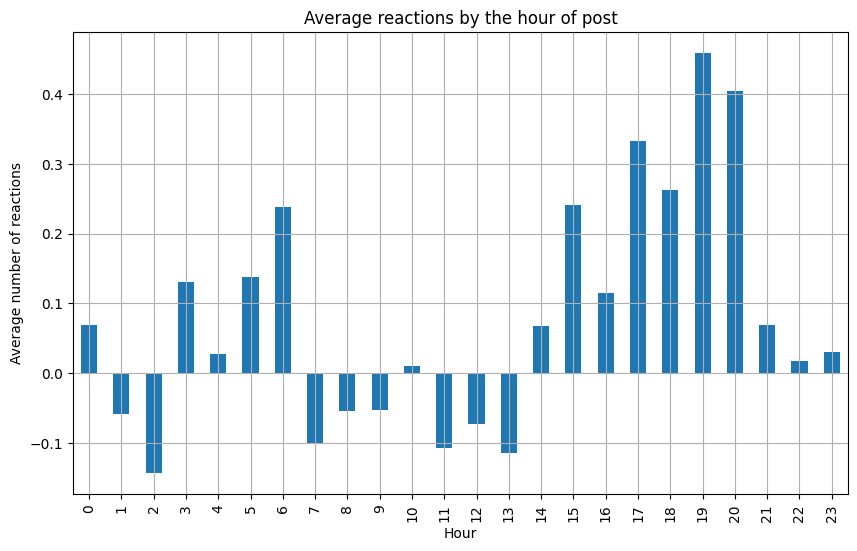

In [20]:
plt.figure(figsize=(10,6))
hourly_reactions.plot(kind='bar')
plt.title('Average reactions by the hour of post')
plt.xlabel('Hour')
plt.ylabel('Average number of reactions')
plt.grid(True)
plt.show()

Is there a correlation between the number of reactions (num_reactions) and other engagement metrics such as comments (num_comments) and shares (num_shares)? If so, what is the strength and direction of this correlation?

In [22]:
engagement = df[['num_reactions','num_comments','num_shares']]
correlation = engagement.corr()

plotting

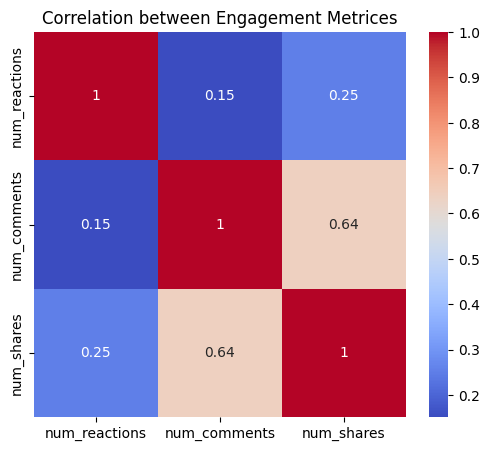

In [23]:
plt.figure(figsize=(6,5))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Engagement Metrices')
plt.show()

Use the columns status_type, num_reactions, num_comments, num_shares, num_likes, num_loves, num_wows, num_hahas, num_sads, and num_angrys to train a K-Means clustering model on the Facebook Live Sellers dataset.

Importing libraries

In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [32]:
numeric_cols = df_clustering.select_dtypes(include=['number'])

In [33]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_cols)

Features for clustering

In [34]:
features = ['status_type','num_reactions','num_comments',
            'num_shares','num_likes','num_loves','num_wows','num_hahas','num_sads','num_angrys']



Clustering the data

In [44]:
df_clustering = df_clustering.apply(pd.to_numeric, errors='coerce')

In [45]:
df_clustering = df[features].dropna()

In [46]:
print(df_clustering.dtypes)


status_type       object
num_reactions    float64
num_comments     float64
num_shares       float64
num_likes        float64
num_loves        float64
num_wows         float64
num_hahas        float64
num_sads         float64
num_angrys       float64
dtype: object


In [47]:
for col in df_clustering.columns:
    print(f"{col}: {df_clustering[col].unique()[:5]}")

status_type: ['video' 'photo' 'link' 'status']
num_reactions: [ 0.64610394 -0.17319166 -0.00673846 -0.25749912 -0.03700268]
num_comments: [ 0.32335035 -0.25220622  0.01308938 -0.24546142  0.43801201]
num_shares: [ 1.6868788  -0.3041444   0.12901714  0.24300702  0.09861984]
num_likes: [ 0.48272661 -0.14472021 -0.02457082 -0.23149477 -0.0089959 ]
num_loves: [ 1.98326643 -0.3184544   0.2069384  -0.09328605 -0.19336087]
num_wows: [ 0.1961959  -0.147879   -0.03318737  0.99903732  0.31088753]
num_hahas: [ 0.07671305 -0.17600986  0.32943597  1.08760471  0.58215888]
num_sads: [ 0.47357035 -0.152587    1.72588505  4.8566718  11.74440264]
num_angrys: [-0.15574803  3.97216021  1.22022138  5.34812962  2.5961908 ]


In [48]:
for col in df_clustering.columns:
    df_clustering[col] = pd.to_numeric(df_clustering[col], errors='coerce')


In [ ]:
Fill missing values using imputation

In [53]:
from sklearn.impute import SimpleImputer

In [54]:
df_clustering = df_clustering.apply(pd.to_numeric, errors='coerce')
imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(df_clustering)

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['status_type']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Standardizing

In [55]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_clustering)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [62]:
print("NaNs before imputation:", df_clustering.isna().sum().sum())

# STEP 3: Impute missing values (mean of each column)
imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(df_clustering)

# Sanity check for any remaining NaNs
print("NaNs after imputation:", np.isnan(imputed_data).sum())

# STEP 4: Scale the imputed data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(imputed_data)

# Final sanity check
print("NaNs after scaling:", np.isnan(scaled_features).sum())

NaNs before imputation: 7050
NaNs after imputation: 0
NaNs after scaling: 0


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['status_type']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Elbow method to find k

In [63]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)


plotting

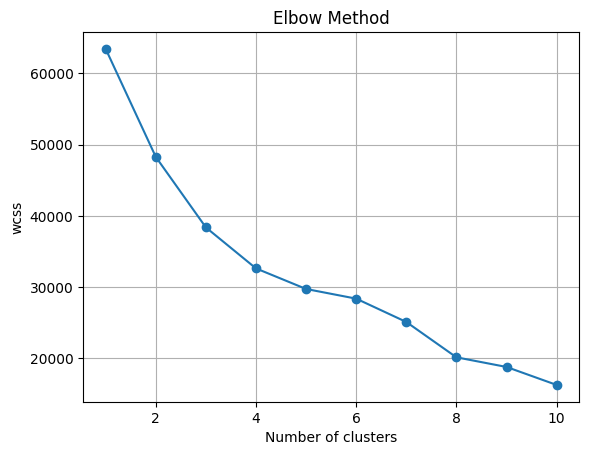

In [64]:
plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.grid(True)
plt.show()

Use the elbow method to find the optimum number of clusters.

In [65]:
post_counts = df['status_type'].value_counts()

plotting

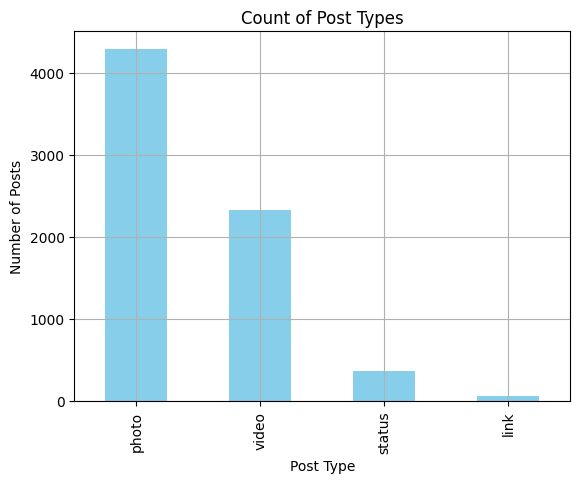

In [66]:
post_counts.plot(kind='bar',color='skyblue')
plt.title('Count of Post Types')
plt.xlabel('Post Type')
plt.ylabel('Number of Posts')
plt.grid(True)
plt.show()

In [67]:
print(post_counts)

status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64


What is the count of different types of posts in the dataset?

In [69]:
averg_metrics = df.groupby('status_type')[['num_reactions','num_comments','num_shares']].mean()
print(averg_metrics)

             num_reactions  num_comments  num_shares
status_type                                         
link              0.302698     -0.245800   -0.270731
photo            -0.105550     -0.234227   -0.284737
status            0.451080     -0.211469   -0.284698
video             0.115204      0.470025    0.574945


What is the average value of num_reaction, num_comments, num_shares for each post type?

In [72]:
df.groupby('status_type')[['num_reactions', 'num_comments', 'num_shares']].mean()


,num_reactions,num_comments,num_shares
status_type,,,
link,0.302698,-0.245800,-0.270731
photo,-0.105550,-0.234227,-0.284737
status,0.451080,-0.211469,-0.284698
video,0.115204,0.470025,0.574945


from matplotlib import pyplot as plt
_df_0['num_reactions'].plot(kind='hist', bins=20, title='num_reactions')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['num_comments'].plot(kind='hist', bins=20, title='num_comments')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['num_shares'].plot(kind='hist', bins=20, title='num_shares')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='num_reactions', y='num_comments', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='num_comments', y='num_shares', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['num_comments']
  ys = series['num_reactions']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('num_comments', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('num_comments')
_ = plt.ylabel('num_reactions')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['num_comments']
  ys = series['num_shares']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('num_comments', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('num_comments')
_ = plt.ylabel('num_shares')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['num_comments']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'num_comments'}, axis=1)
              .sort_values('num_comments', ascending=True))
  xs = counted['num_comments']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('num_comments', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('num_comments')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_8['num_reactions'].plot(kind='line', figsize=(8, 4), title='num_reactions')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['num_comments'].plot(kind='line', figsize=(8, 4), title='num_comments')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['num_shares'].plot(kind='line', figsize=(8, 4), title='num_shares')
plt.gca().spines[['top', 'right']].set_visible(False)